In [1]:
# ALL IMPORTS

# <!--BASIC & PANDAS: -->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# <!-- SQL: -->
import sqlite3 
conn = sqlite3.connect('data.db')
cur = conn.cursor()

# <!-- WEBSCARAPING AND APIs -->
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import time

In [2]:
df = pd.read_csv('../df_100.csv')

In [3]:
df.genre_ids = df.genre_ids.apply(lambda x: eval(x))

In [4]:
genre_list = []
for genres in df.genre_ids:
    for genre in genres:
        if genre not in genre_list:
            genre_list.append(genre)

In [5]:
genre_counts = {}
genre_percents = {}
for genre in genre_list:
    genre_counts[genre] = 0
    genre_percents[genre] = 0

In [6]:
for genres in df.genre_ids:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1

In [7]:
genre_counts

{'Action': 55,
 'Adventure': 66,
 'Science Fiction': 33,
 'Fantasy': 29,
 'Thriller': 13,
 'Family': 28,
 'Animation': 21,
 'Romance': 9,
 'Comedy': 30,
 'Crime': 5,
 'Drama': 26,
 'Music': 3,
 'War': 4,
 'Horror': 6,
 'Western': 1,
 'Mystery': 3}

In [8]:
genre_percents

{'Action': 0,
 'Adventure': 0,
 'Science Fiction': 0,
 'Fantasy': 0,
 'Thriller': 0,
 'Family': 0,
 'Animation': 0,
 'Romance': 0,
 'Comedy': 0,
 'Crime': 0,
 'Drama': 0,
 'Music': 0,
 'War': 0,
 'Horror': 0,
 'Western': 0,
 'Mystery': 0}

In [9]:
for genre in genre_counts:
    genre_percents[genre] = round((genre_counts[genre]/sum(genre_counts.values())*100))

In [10]:
top_genres = dict()
Other_genres = dict()
for (key, value) in genre_percents.items():
    if value > 2:
        top_genres[key] = value
    else:
        Other_genres[key] = value

In [11]:
Other_genres.keys()

dict_keys(['Crime', 'Music', 'War', 'Horror', 'Western', 'Mystery'])

In [12]:
top_genres

{'Action': 17,
 'Adventure': 20,
 'Science Fiction': 10,
 'Fantasy': 9,
 'Thriller': 4,
 'Family': 8,
 'Animation': 6,
 'Romance': 3,
 'Comedy': 9,
 'Drama': 8}

In [13]:
top_genre_counts = dict()
Other_genre_counts = dict()
for (key,value) in genre_counts.items():
    if key in top_genres.keys():
        top_genre_counts[key] = value
    else:
        Other_genre_counts[key] = value

In [14]:
top_genre_counts['Other'] = sum(Other_genre_counts.values())

In [15]:
top_genre_counts

{'Action': 55,
 'Adventure': 66,
 'Science Fiction': 33,
 'Fantasy': 29,
 'Thriller': 13,
 'Family': 28,
 'Animation': 21,
 'Romance': 9,
 'Comedy': 30,
 'Drama': 26,
 'Other': 22}

In [16]:
Other_df = pd.DataFrame.from_dict({'Other':sum(Other_genres.values())},orient='index')

In [17]:
df_genres_100 = pd.DataFrame.from_dict(top_genres,orient='index')
df_genres_100 = df_genres_100.append(Other_df)

In [18]:
df_genres_100['Percentages'] = df_genres_100[0]
del df_genres_100[0]

In [19]:
df_genres_100.sort_values(by='Percentages',ascending = False,inplace=True)

In [20]:
df_genres_100

,Percentages
Adventure,20
Action,17
Science Fiction,10
Fantasy,9
Comedy,9
Family,8
Drama,8
Other,7
Animation,6
Thriller,4


In [21]:
df_genres_100.insert(1,'Frequency',top_genre_counts.values())

In [22]:
df_genres_100

,Percentages,Frequency
Adventure,20,55
Action,17,66
Science Fiction,10,33
Fantasy,9,29
Comedy,9,13
Family,8,28
Drama,8,21
Other,7,9
Animation,6,30
Thriller,4,26


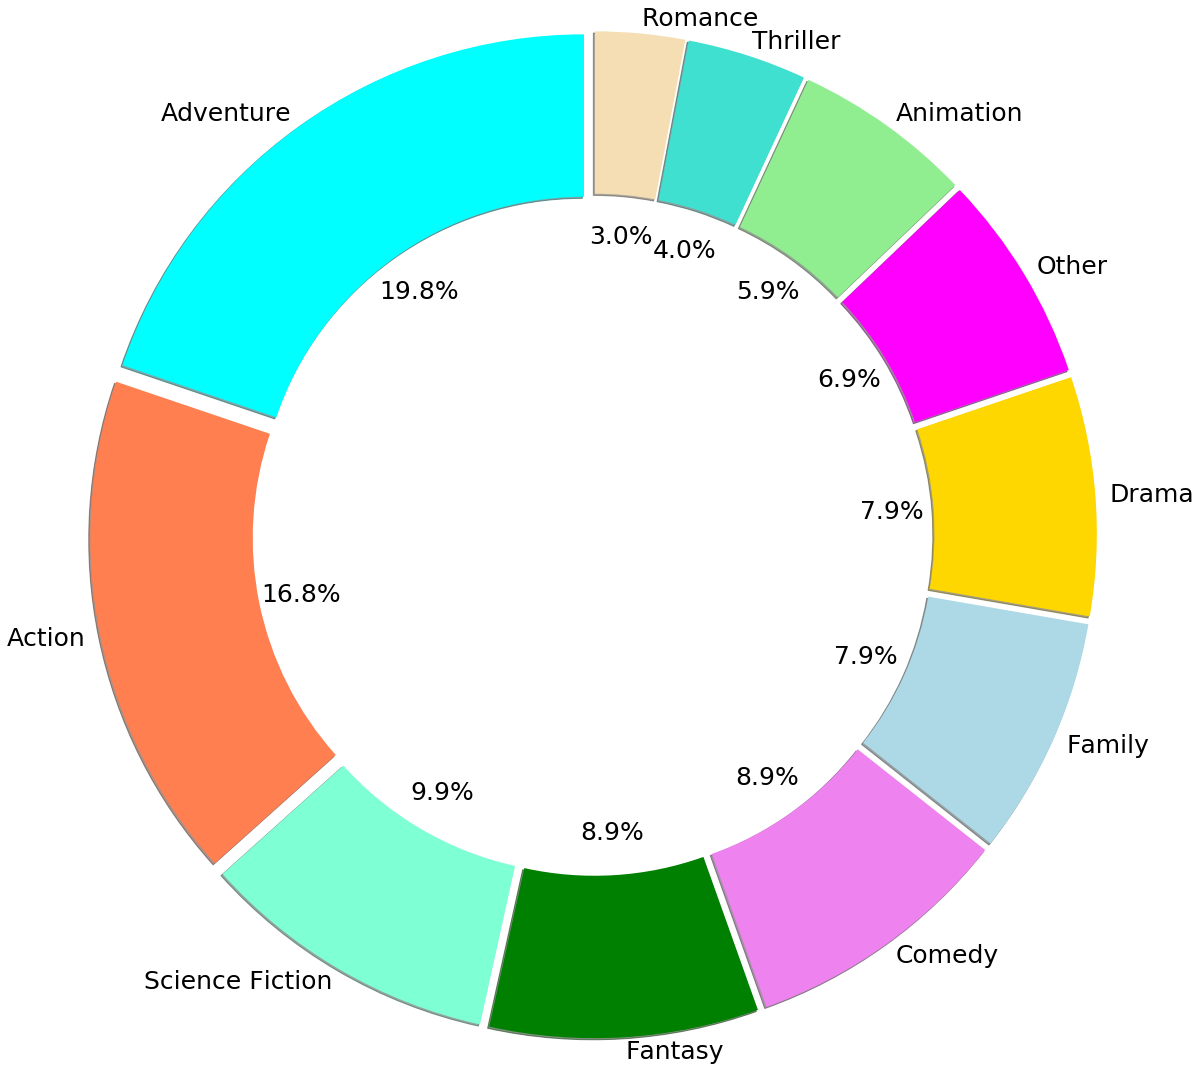

<Figure size 1440x1440 with 0 Axes>

In [41]:
labels = df_genres_100.index
sizes = df_genres_100.Percentages
colors = ['aqua','coral','aquamarine','green','violet','lightblue','gold','magenta','lightgreen','turquoise','wheat']
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2)

fig1,ax1 = plt.subplots()
ax1.axis('equal')  
plt.tight_layout()
plt.figure(figsize=(20,20))

pie,labtext,labpct = ax1.pie(radius=6,x=sizes, colors = colors, labels=labels, shadow=True,autopct='%1.1f%%', startangle=90, pctdistance=.58, labeldistance=1.03,explode=explode)
plt.setp(pie,width=2)
#draw circle
# centre_circle = plt.Circle((0,0),0.60)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
#fontsize edits
fig1.savefig('foo.png',transparent=True)
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 25
plt.rcParams['lines.linewidth'] = 50
# Equal aspect ratio ensures that pie is drawn as a circle

plt.show()